## Lab 11: Plotting Skew-<i>T</i>, ln-<i>p</i> diagrams
<br /><br />
In this exercise, we are going to create Skew-<i>T</i>, ln-<i>p</i> diagrams from observed data at specific locations. We will once again use the MetPy functionality for plotting Skew-<i>T</i>, ln-<i>p</i> diagrams.
<br />
### Module Documentation

1. Matplotlib Pyplot: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html
2. Siphon Wyoming Upper Air: https://unidata.github.io/siphon/latest/api/simplewebservice.html#siphon.simplewebservice.wyoming.WyomingUpperAir.request_data
3. MetPy Skew T: https://unidata.github.io/MetPy/latest/api/generated/metpy.plots.SkewT.html




If you have any questions about the code below, feel free to reach out to me at mpvossen@uwm.edu. I am always willing to further explain the code. <br /> <br />

---

<br />
1. As usual, we start by importing the modules we need for our Python code.

In [42]:
#from python's date and time module (from datetime), import the ability to work with date and times (import datetime)
from datetime import datetime

#using the module siphon and its ability to retrieve files from online (.simplewebservice), specifically for the University of Wyoming (.wyoming), 
#import the ability to download from the University of Wyoming's upper-air data archive
from siphon.simplewebservice.wyoming import WyomingUpperAir

#from metpy's plotting abilities, import the SkewT plotting class
from metpy.plots import SkewT

#import the plotting abilities of the module matplotlib (import matplotlib.pyplot) and save it to plt
import matplotlib.pyplot as plt

#from the metpy units feature (metpy.units), import the ability to assign and convert units (units)
from metpy.units import units

<br /><br />
2. Like we have done in past labs, we first need to create variables to collect our desired data.  For a rawinsonde observation, we need two variables: the date and time for the observation (in datetime format) and the three-character identifier for the observation location (as a string).  In the code block below, define the time variable as sounding_date and set it to 1200 UTC September 29, 2012 and define the site variable as station and set it to MPX (Chanhassen, MN).

In [43]:
sounding_date=datetime(2012,9,29,12)
station="MPX"

<br /><br />
3. In the code section below, take the variables you created above and pass them into the WyomingUpperAir.request_data() function that has been started for you below.  To see how to pass in the data, go to https://unidata.github.io/siphon/latest/api/simplewebservice.html#siphon.simplewebservice.wyoming.WyomingUpperAir.request_data.

In [44]:
upper_air_data = WyomingUpperAir.request_data(sounding_date,station)
upper_air_data

pressure  height  temperature  dewpoint  direction  speed     u_wind  \
0       985.0     287          7.8       5.1        0.0    0.0  -0.000000   
1       983.0     304         10.6       3.6      358.0    1.0   0.034899   
2       981.0     321         13.4       4.4      355.0    3.0   0.261467   
3       971.0     409         15.6       2.6      343.0   10.0   2.923717   
4       960.0     507         20.0       1.0      329.0   17.0   8.755647   
..        ...     ...          ...       ...        ...    ...        ...   
134      10.3   30845        -48.5     -82.5      260.0   35.0  34.468271   
135      10.0   31040        -47.3     -82.3      265.0   33.0  32.874425   
136       8.9   31812        -46.1     -81.1      262.0   41.0  40.600991   
137       8.3   32309        -43.3     -79.0      260.0   46.0  45.301157   
138       8.0   32527        -42.1     -78.1        NaN    NaN        NaN   

        v_wind station  station_number                time  latitude  \
0    -0.000000     MPX           72649 2012-09-29 12:00:00     44.85   
1    -0.999391     MPX           72649 2012-09-29 12:00:00     44.85   
2    -2.988584     MPX           72649 2012-09-29 12:00:00     44.85   
3    -9.563048     MPX           72649 2012-09-29 12:00:00     44.85   
4   -14.571844     MPX           72649 2012-09-29 12:00:00     44.85   
..         ...     ...             ...                 ...       ...   
134   6.077686     MPX           72649 2012-09-29 12:00:00     44.85   
135   2.876140     MPX           72649 2012-09-29 12:00:00     44.85   
136   5.706097     MPX           72649 2012-09-29 12:00:00     44.85   
137   7.987816     MPX           72649 2012-09-29 12:00:00     44.85   
138        NaN     MPX           72649 2012-09-29 12:00:00     44.85   

     longitude  elevation     pw  
0       -93.56      287.0  17.16  
1       -93.56      287.0  17.16  
2       -93.56      287.0  17.16  
3       -93.56      287.0  17.16  
4       -93.56      287.0  17.16  
..         ...        ...    ...  
134     -93.56      287.0  17.16  
135     -93.56      287.0  17.16  
136     -93.56      287.0  17.16  
137     -93.56      287.0  17.16  
138     -93.56      287.0  17.16  

[139 rows x 15 columns]

<br /><br />
4. We are now ready to plot.  Like in previous labs, we will once again use a function for our plot since we will be plotting multiple Skew-<i>T</i>, ln-<i>p</i> diagrams.  Watch out in the comments for areas you need to fill in.

In [45]:
"""
Below, a function is defined to plot a Skew-T, ln-p diagram from observation data.  This plot contains
temperature and dewpoint traces.


INPUT:
    data : PANDAS DATAFRAME
        The observed rawinsonde data.
    station : STRING
        The rawinsonde station at which the data are valid.
    valid_time : DATETIME
        The date and time of the rawinsonde observation.
"""


def plot_skewT(data, station, valid_time):
    """
    For the Skew-T, ln-p plots, MetPy requires all inputs into the plot to have units.
    Assign the appropriate units for the pressure, temperature, dew point, and wind variables.
    Note: we don't want to convert the units, we just need to append the data's units to the data.
    Hint: Assign the units using MetPy.
    """
    p = data['pressure'].values 
    T = data['temperature'].values
    Td = data['dewpoint'].values
    u = data['u_wind'].values 
    v = data['v_wind'].values    
    
    """
    Define a matplotlib figure that is 900px x 900px with a resolution of 300 dots per inch and save it to the variable fig.
    """
    fig=plt.figure(figsize=(9,9),dpi=300)
    
    
    """
    Here I initialize a Skew-T, ln-p diagram similar to how we defined our axes in previous labs.
    
    The first argument is the figure variable so MetPy knows what to use to create the Skew-T, ln-p axes.
    The second argument is how to rotate the temperature axis.  The standard Skew-T, ln-p diagram uses a 45° skew.
    """
    skew = SkewT(fig, rotation=45)
    
    
    """
    Like in previous labs, we want to limit the plot's extent.  However, in the case of Skew-T, ln-p diagrams,
    limiting the plot's extent is handled different from before.  For the Skew-T, ln-p diagram, we must have
    separate statements for the x and y axes with the minimum value in the first argument and the maximum value in the second
    argument. In the two lines of code below, I set the extent of the plot to 1000-100 hPa and -30°C to 40°C.
    """
    skew.ax.set_ylim(1000, 100)
    skew.ax.set_xlim(-30, 40)
    
    
    """
    We are ready to now start drawing our temperature and dewpoint traces.  In the lines
    below, use MetPy's SkewT plotting abilities to plot the temperature and dewpoint trace.
    
    Hint: Documentation for this is available at https://unidata.github.io/MetPy/latest/api/generated/metpy.plots.SkewT.html#metpy.plots.SkewT.plot.
    """
    skew.plot(data['pressure'].values,data['temperature'].values, color='red')
    skew.plot(data['pressure'].values,data['dewpoint'].values,color='darkgreen')  
    
    """
    We need to thin the wind data since there are too many observations to legibly plot.
    In the code below, set up a slice for the wind barbs (like in mapping labs) and have it skip
    every 3 observations.
    """
    wind_slice = slice(None, None, 3)
    
    
    """
    In the line below, plot the wind barbs on the right side of the diagram, 
    outside the main Skew-T section, using the slice we created to thin the wind barbs.
    
    Hint: Documentation for this is available at https://unidata.github.io/MetPy/latest/api/generated/metpy.plots.SkewT.html#metpy.plots.SkewT.plot_barbs.
    """
    skew.plot_barbs(p[wind_slice], u[wind_slice], v[wind_slice], length=5, xloc=1.05) 
    
    
    """
    In order to see some of the thermodynamic properties of the sounding, we need to add
    dry adiabats, moist/pseudoadiabats, and mixing ratio lines. Using the documentation
    given below, add these lines to your diagram.
    
    Moist/Pseudoadiabats:
    https://unidata.github.io/MetPy/latest/api/generated/metpy.plots.SkewT.html#metpy.plots.SkewT.plot_moist_adiabats
    
    Dry Adiabats:
    https://unidata.github.io/MetPy/latest/api/generated/metpy.plots.SkewT.html#metpy.plots.SkewT.plot_dry_adiabats
    
    Mixing Ratio Lines:
    https://unidata.github.io/MetPy/latest/api/generated/metpy.plots.SkewT.html#metpy.plots.SkewT.plot_mixing_lines
    
    Note that the default styling for these lines makes the plot messy.  
    Luckily, however, these augments use the standard styling arguments for
    lines in matplotlib.  Thus, add styling information to the plotting commands
    that you add below to ensure a legible plot.
    """
    skew.plot_moist_adiabats(color='c', linestyle='--', linewidth=1)
    skew.plot_dry_adiabats(color='b', linestyle='--', linewidth=1)
    skew.plot_mixing_lines(color='g', linestyle='--', linewidth=1)
    
    

    """
    Since we are not plotting geographic data, we need to provide labels for the x and y axes.
    The two lines provide appropriate labels for these axes.
    """
    skew.ax.set_xlabel("Temperature ($\degree$C)")
    skew.ax.set_ylabel("Pressure (hPa)")
    
    
    """
    Finally, like all plots we have created this semester, this plot needs a title.  Create an appropriate title 
    for this plot using the station name and time that we used to get the data.
    """
    plot_title= f"{station} at {valid_time:%m/%d/%Y %H%M} UTC"
    plt.title(plot_title, weight="bold")  
    
    

<br /><br />
5. Call the plotting function you just created.

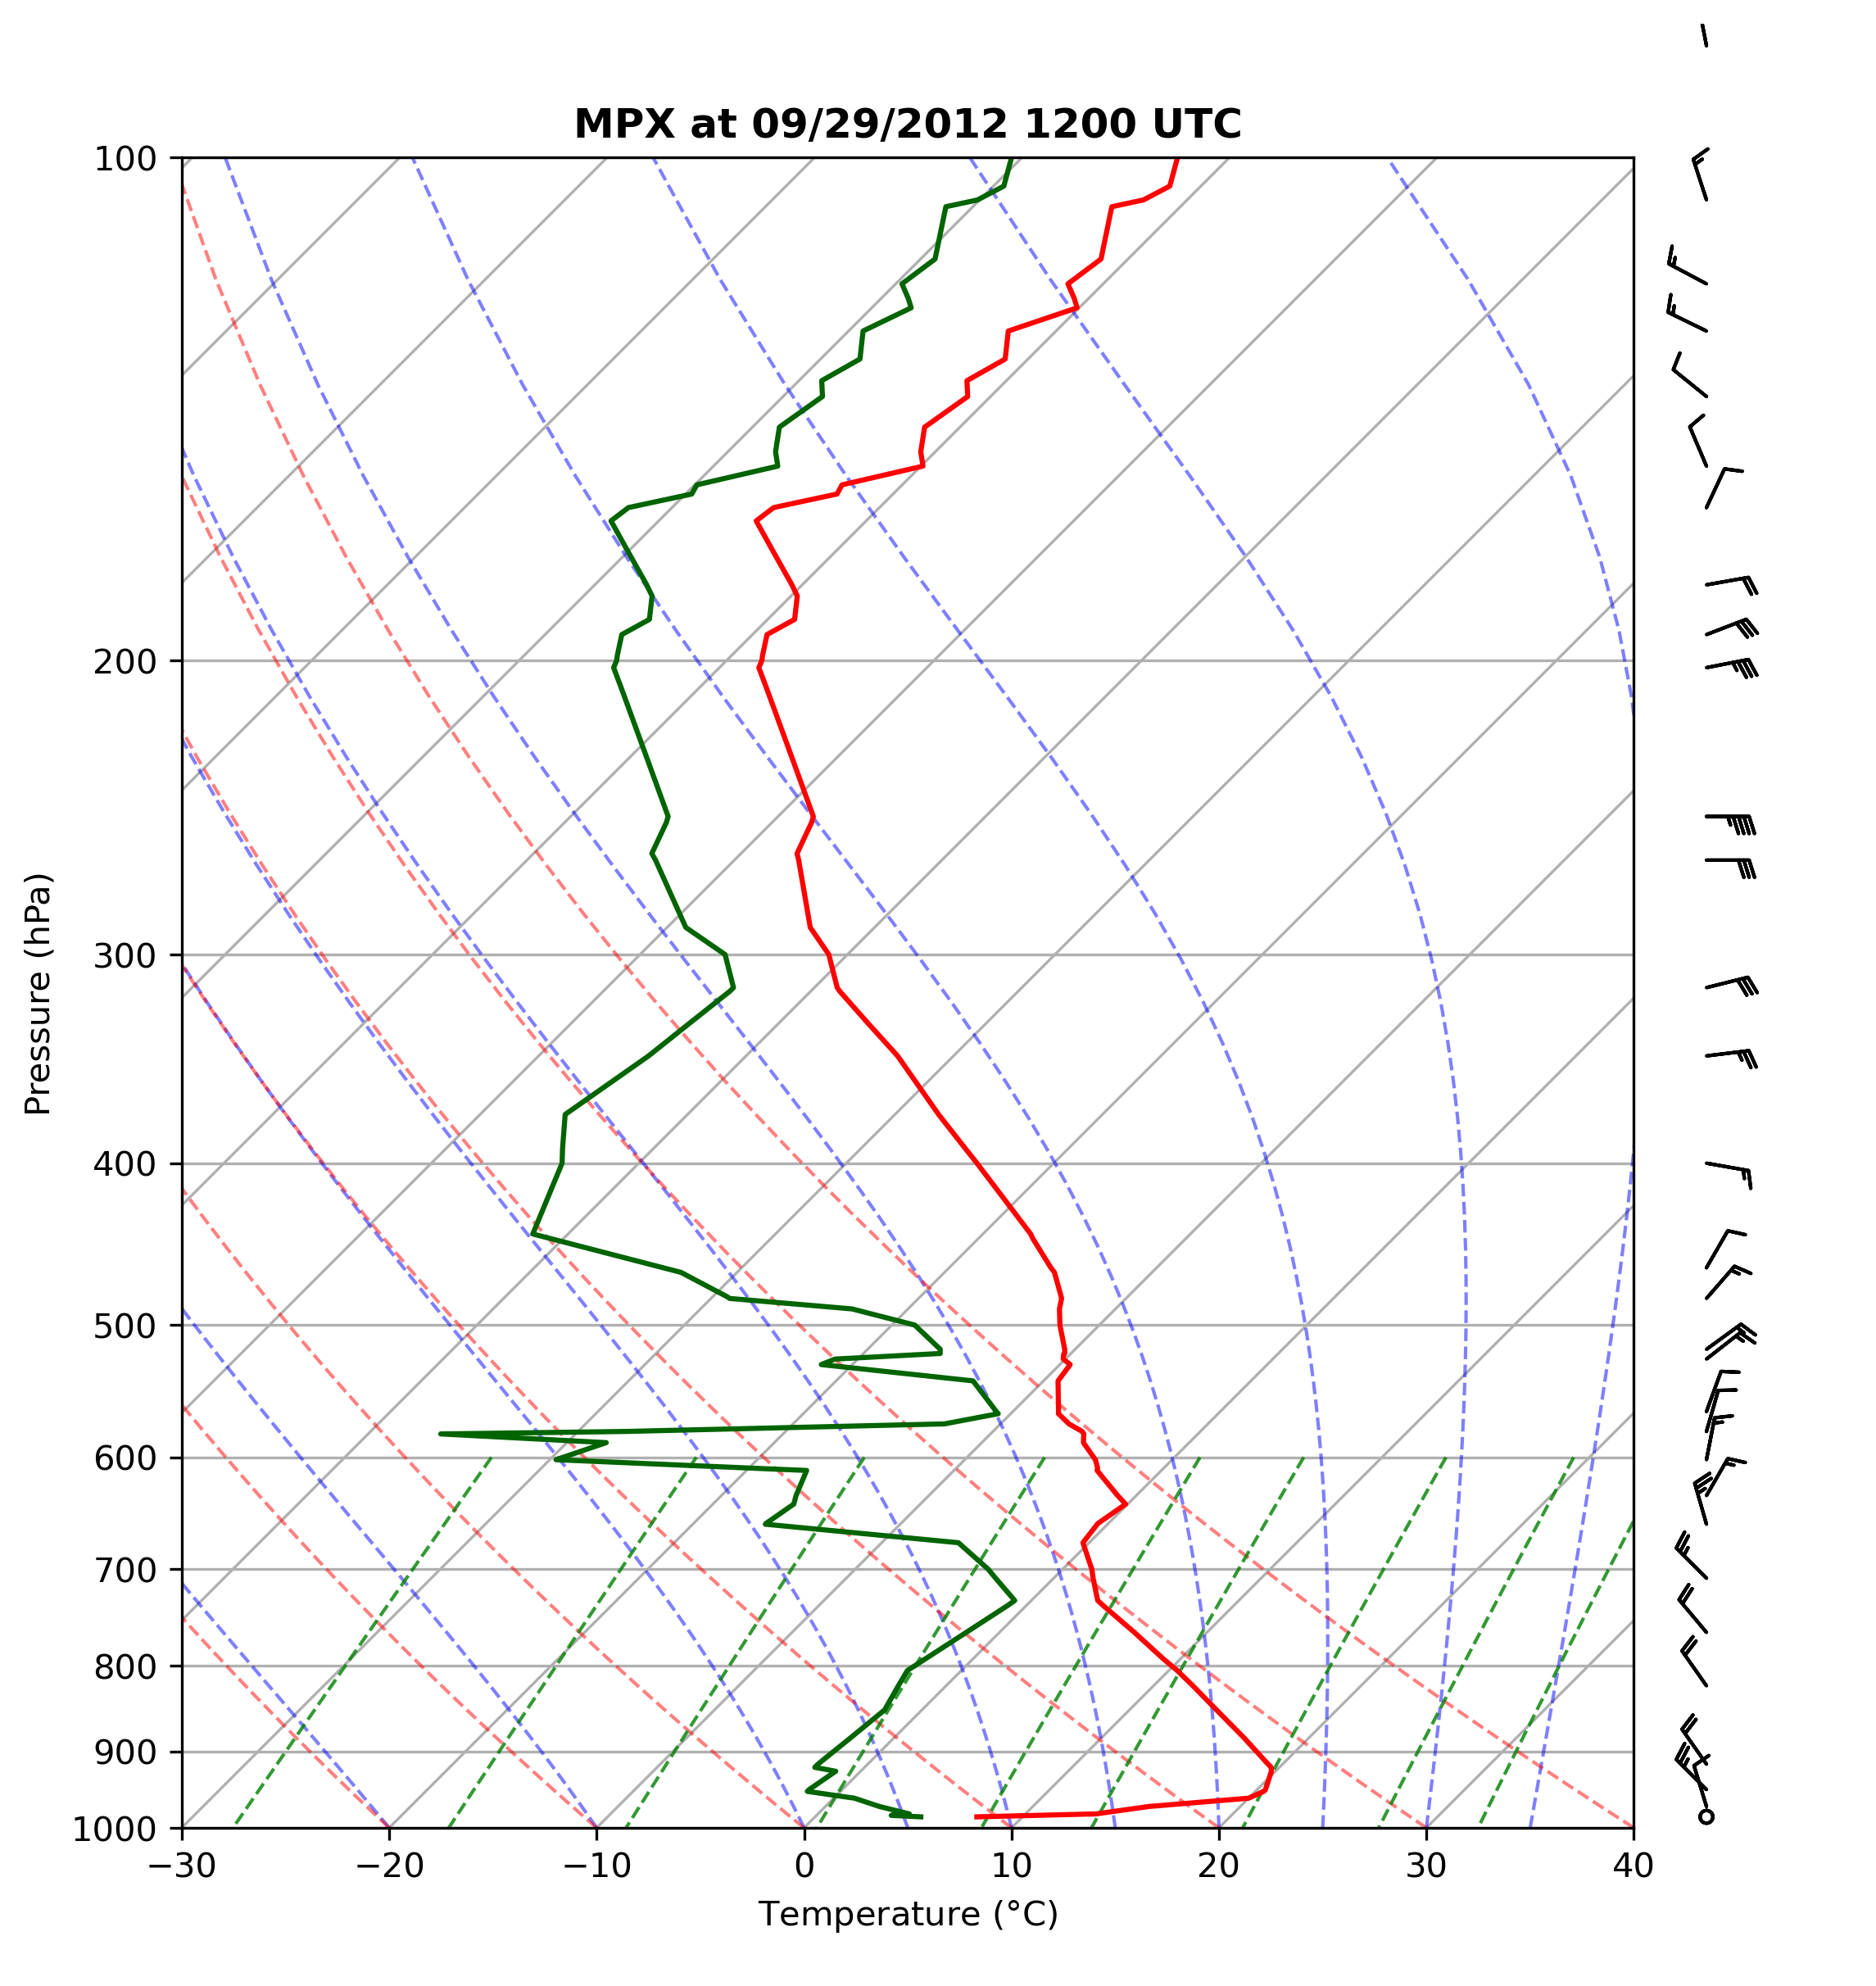

In [46]:
plot_skewT(upper_air_data,station,sounding_date)

<br /><br />
6. We need a total of six Skew-<i>T</i>, ln-<i>p</i> plots for today's lab.  We could manually type out the function for each sounding we want to view, but today we are going to use a loop to plot all of our Skew-<i>T</i>, ln-<i>p</i> plots.  I've complete the code for this below, but follow along with the comments to see what I am doing since you will have to recreate this code in the next lab.  

For today, we want to generate soundings for the following times and locations:

| Time | Sounding Site |
|:----:|:----------:|
| 1/13/2007 0000 UTC | SGF |
| 1/17/2004 1200 UTC | ILN |
| 10/5/2013 0000 UTC | RAP |
| 4/24/2009 1200 UTC | MPX |
| 5/5/2007 0000 UTC | OUN |
| 8/7/2013 0000 UTC | MPX |


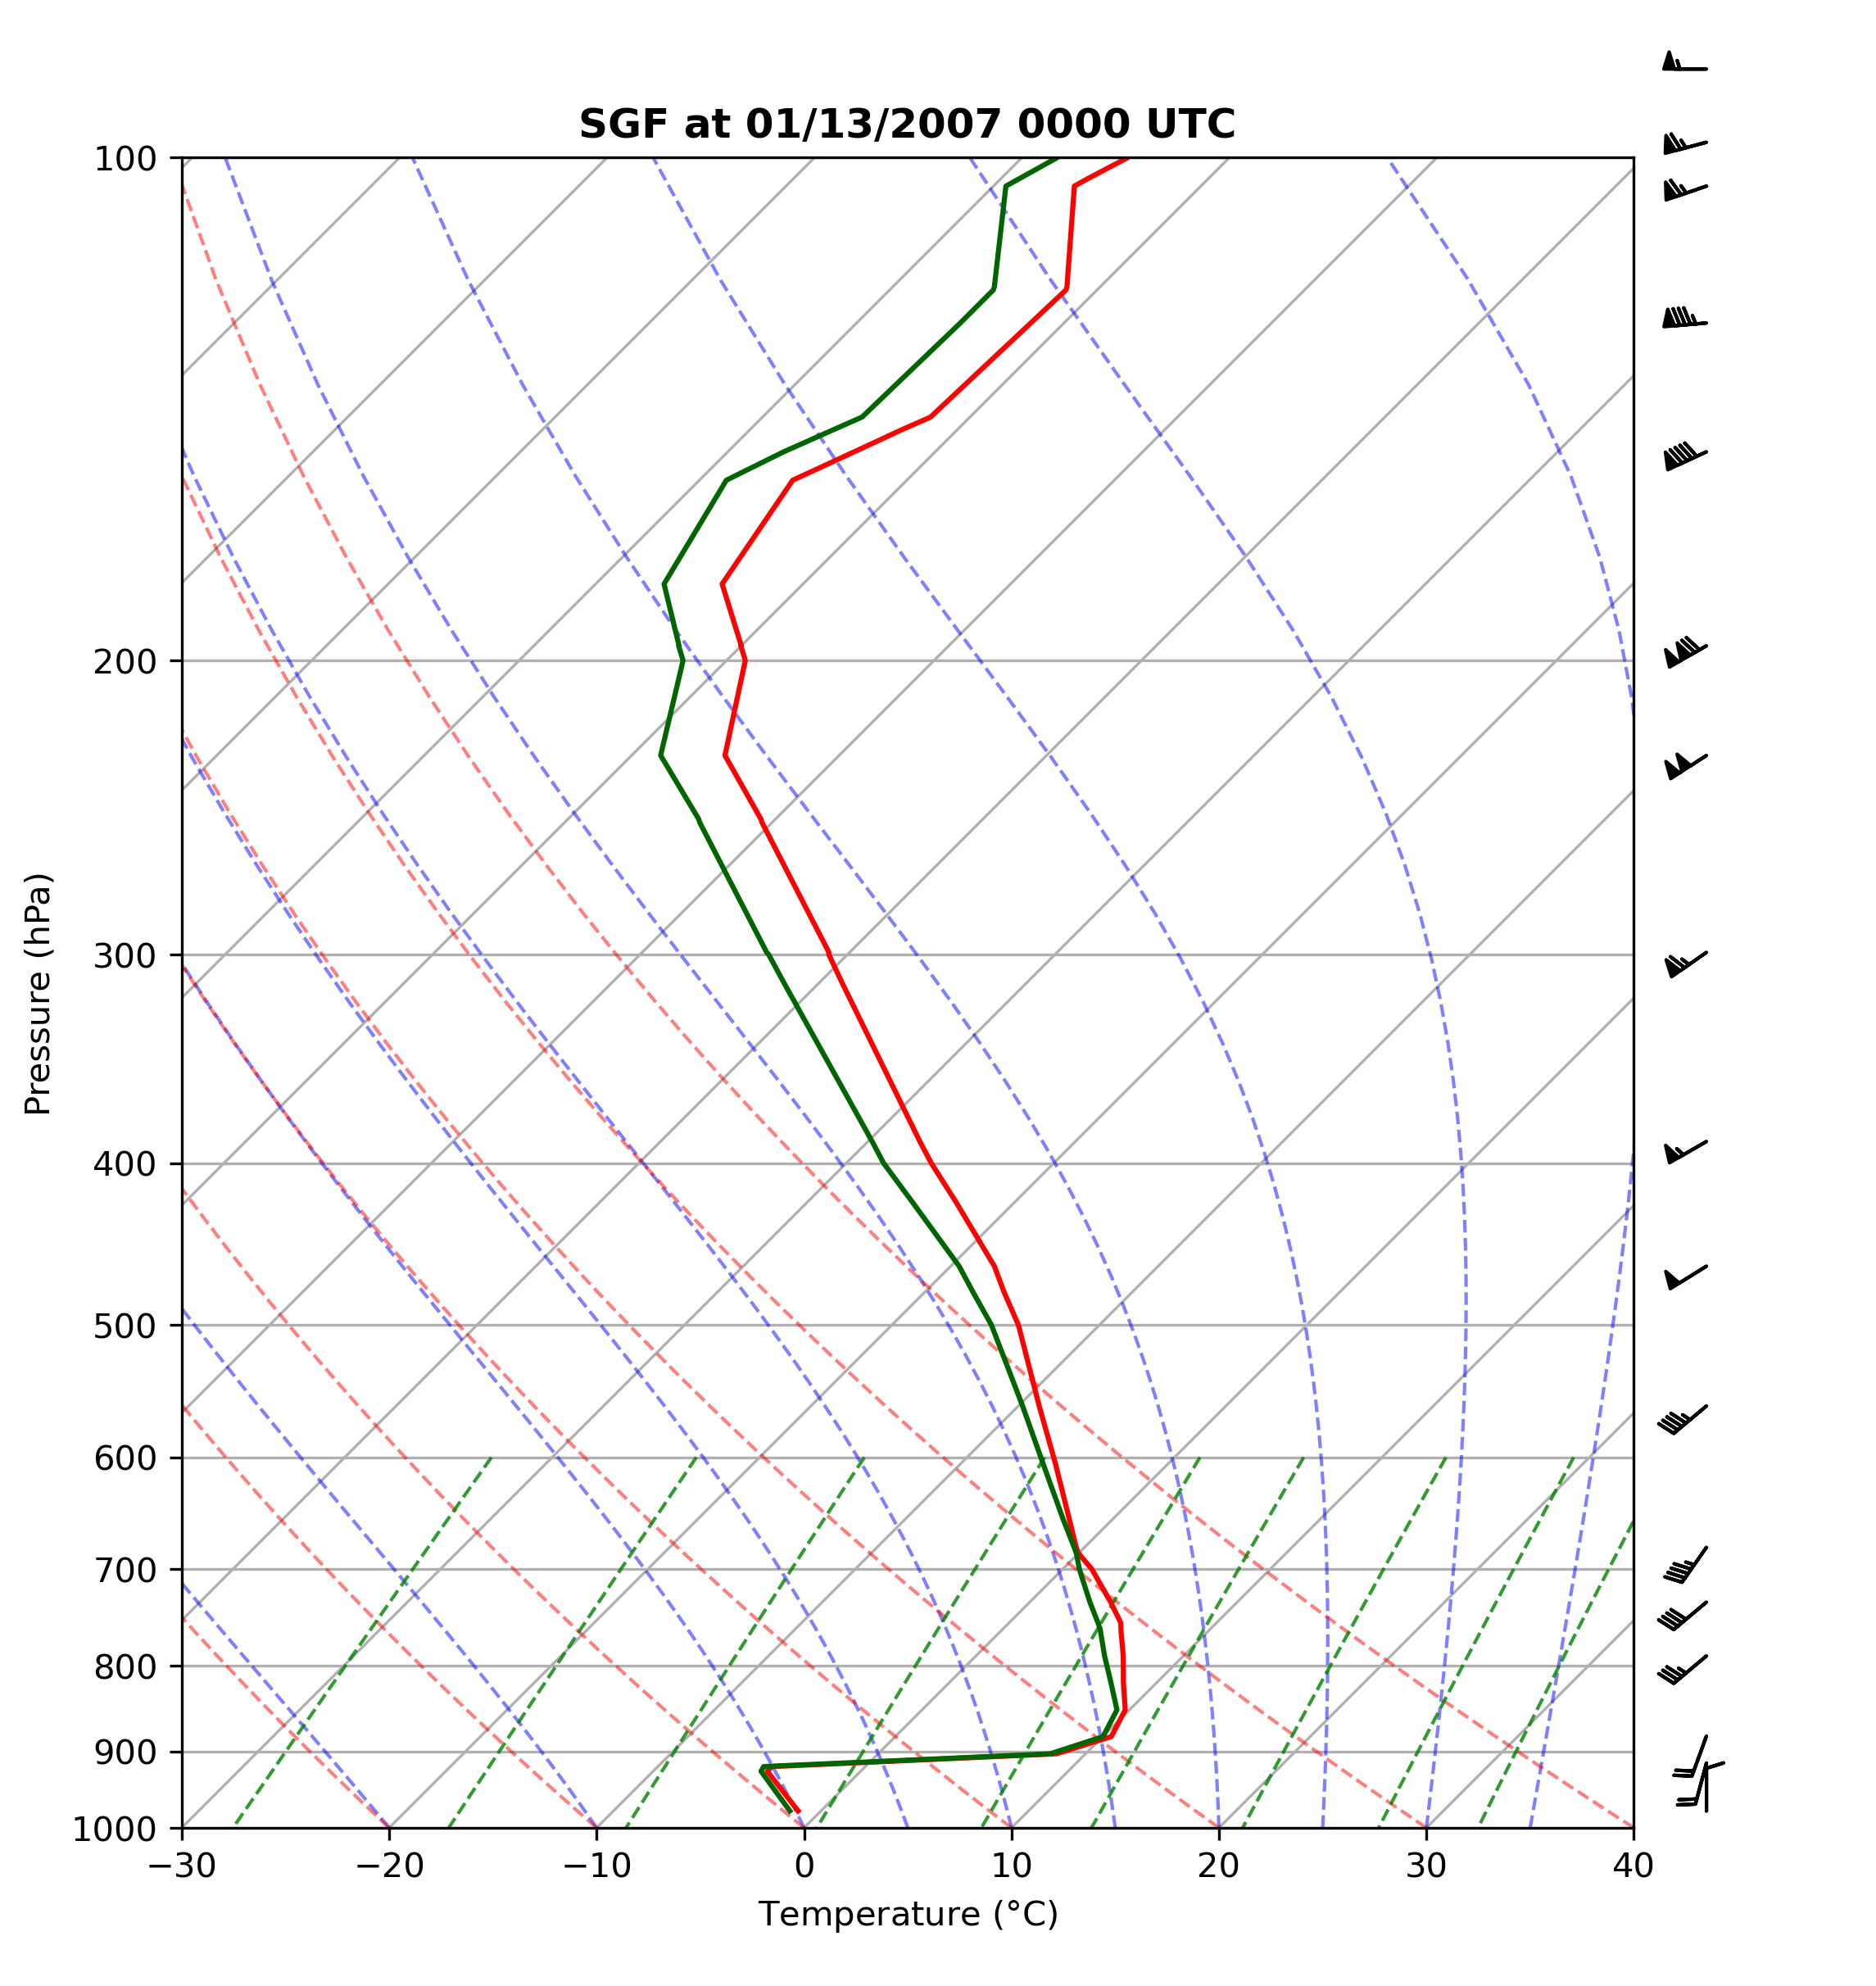

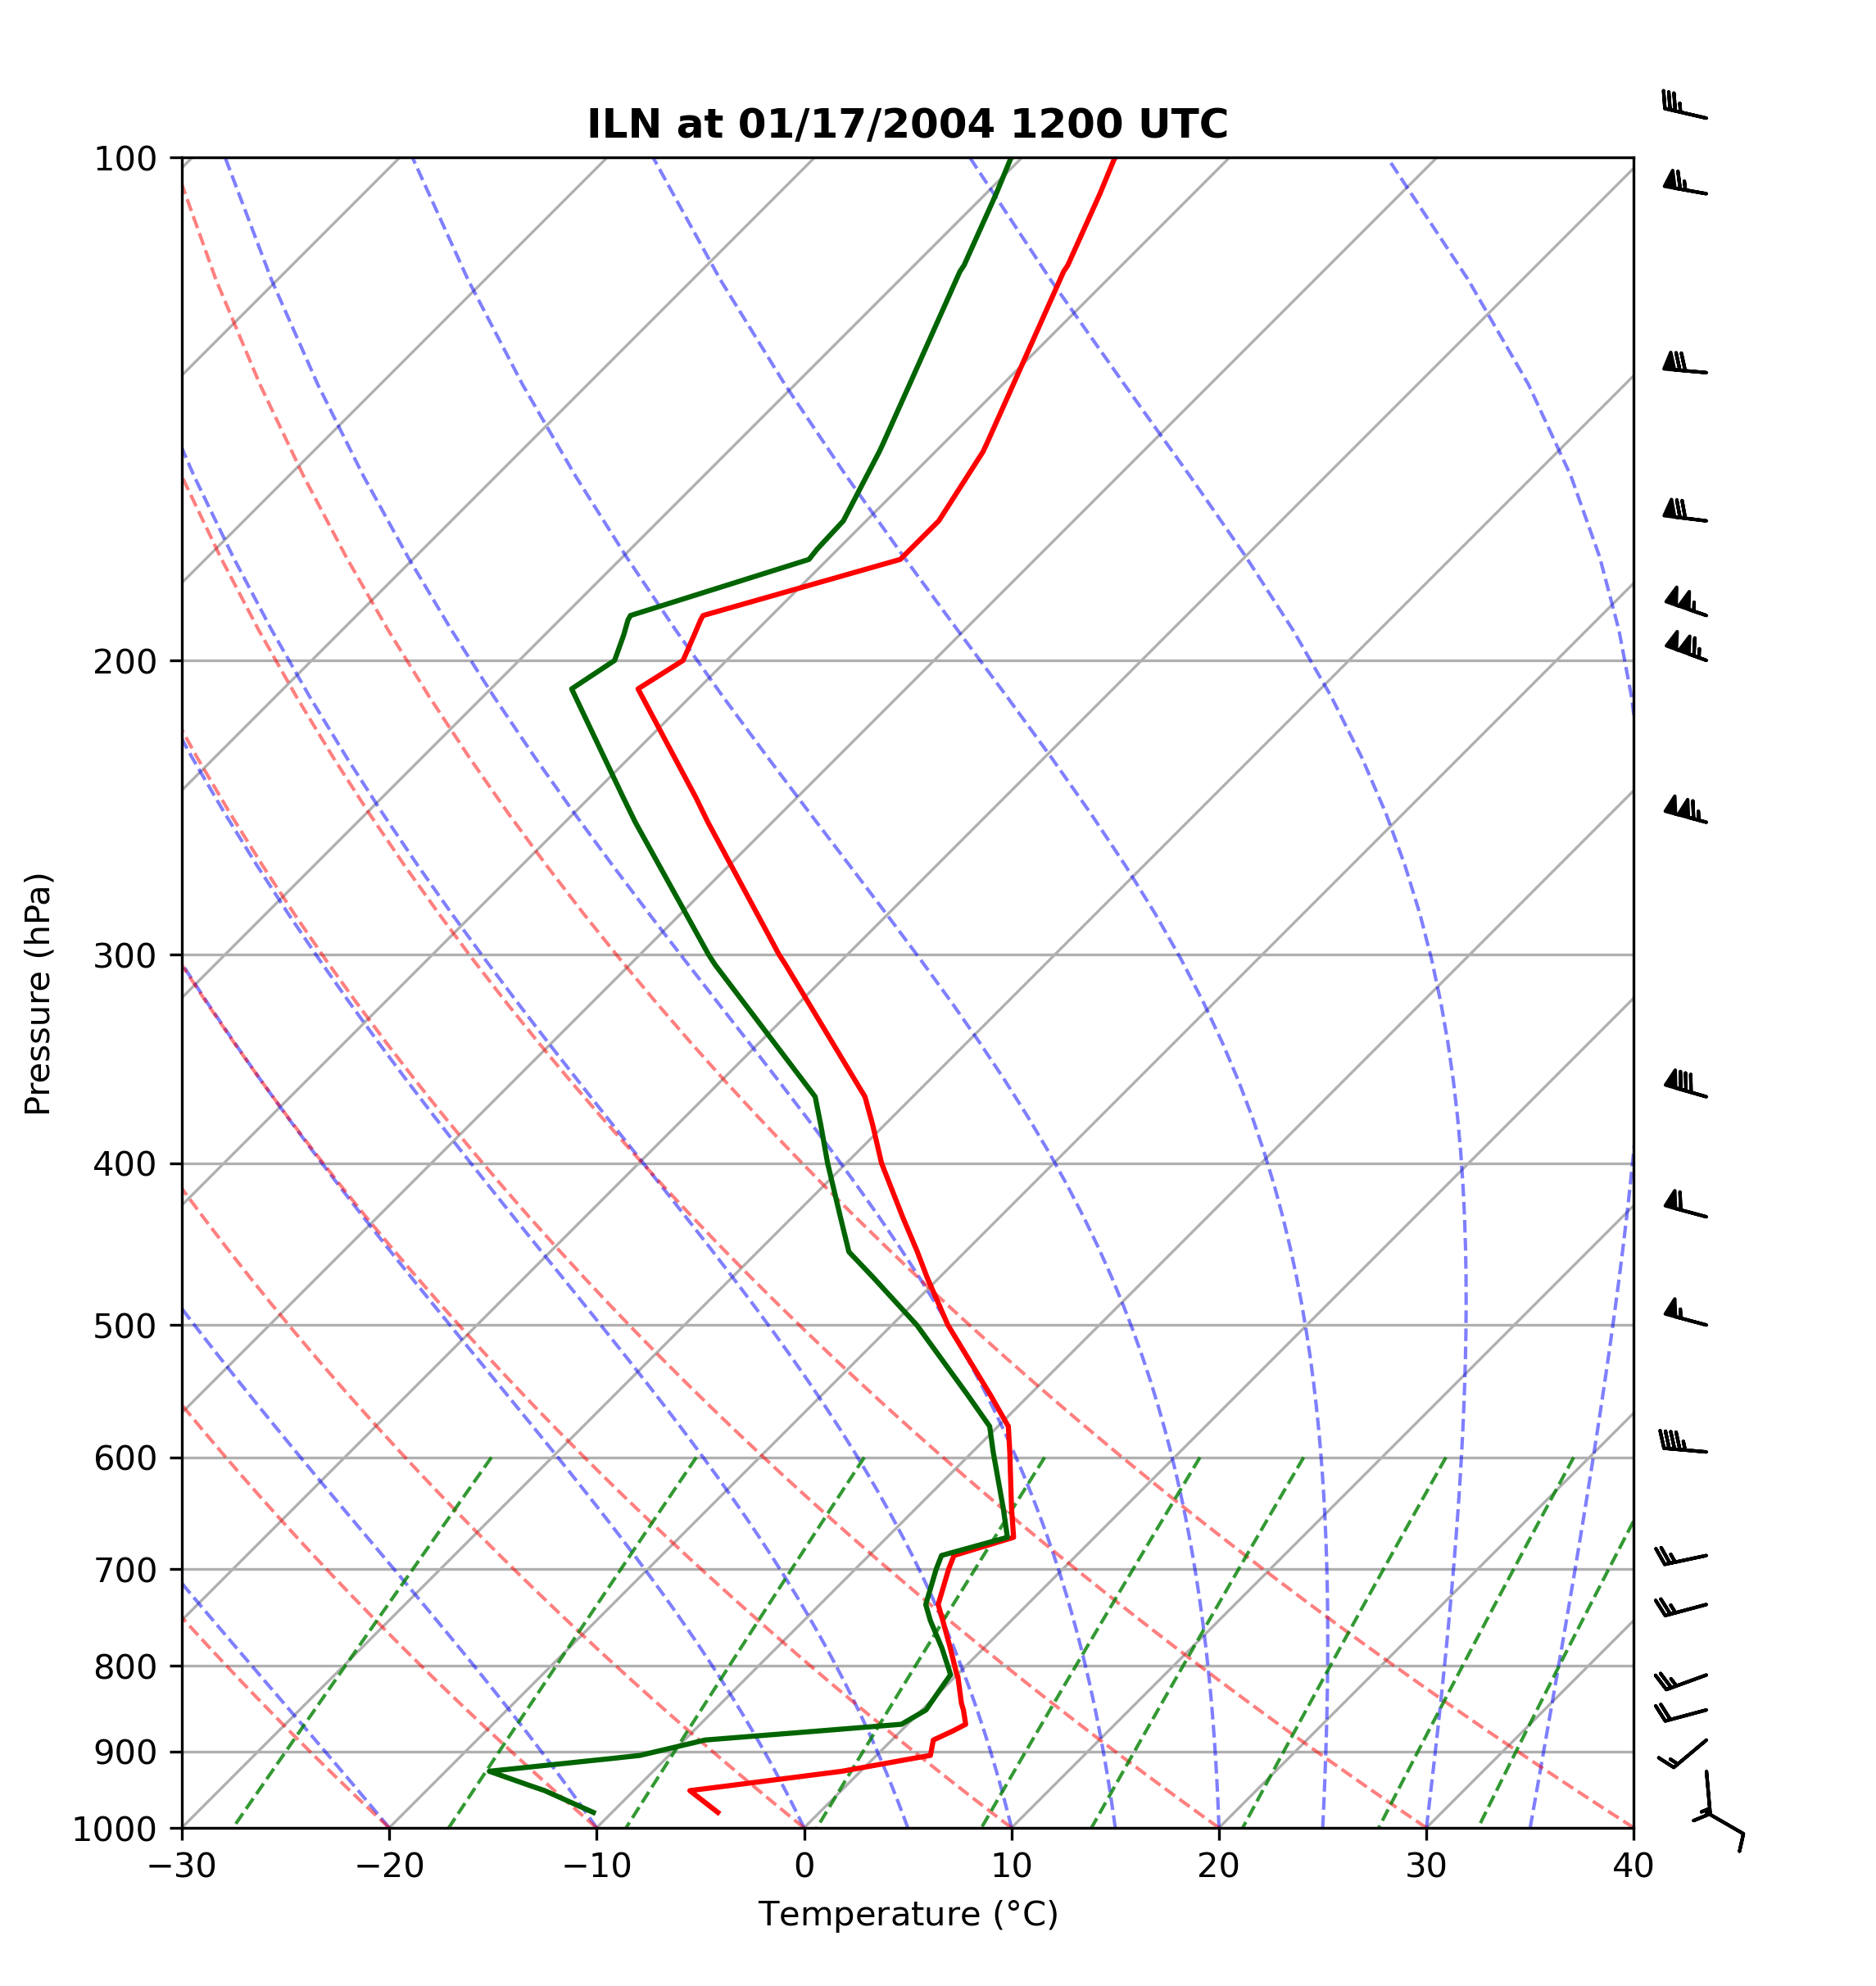

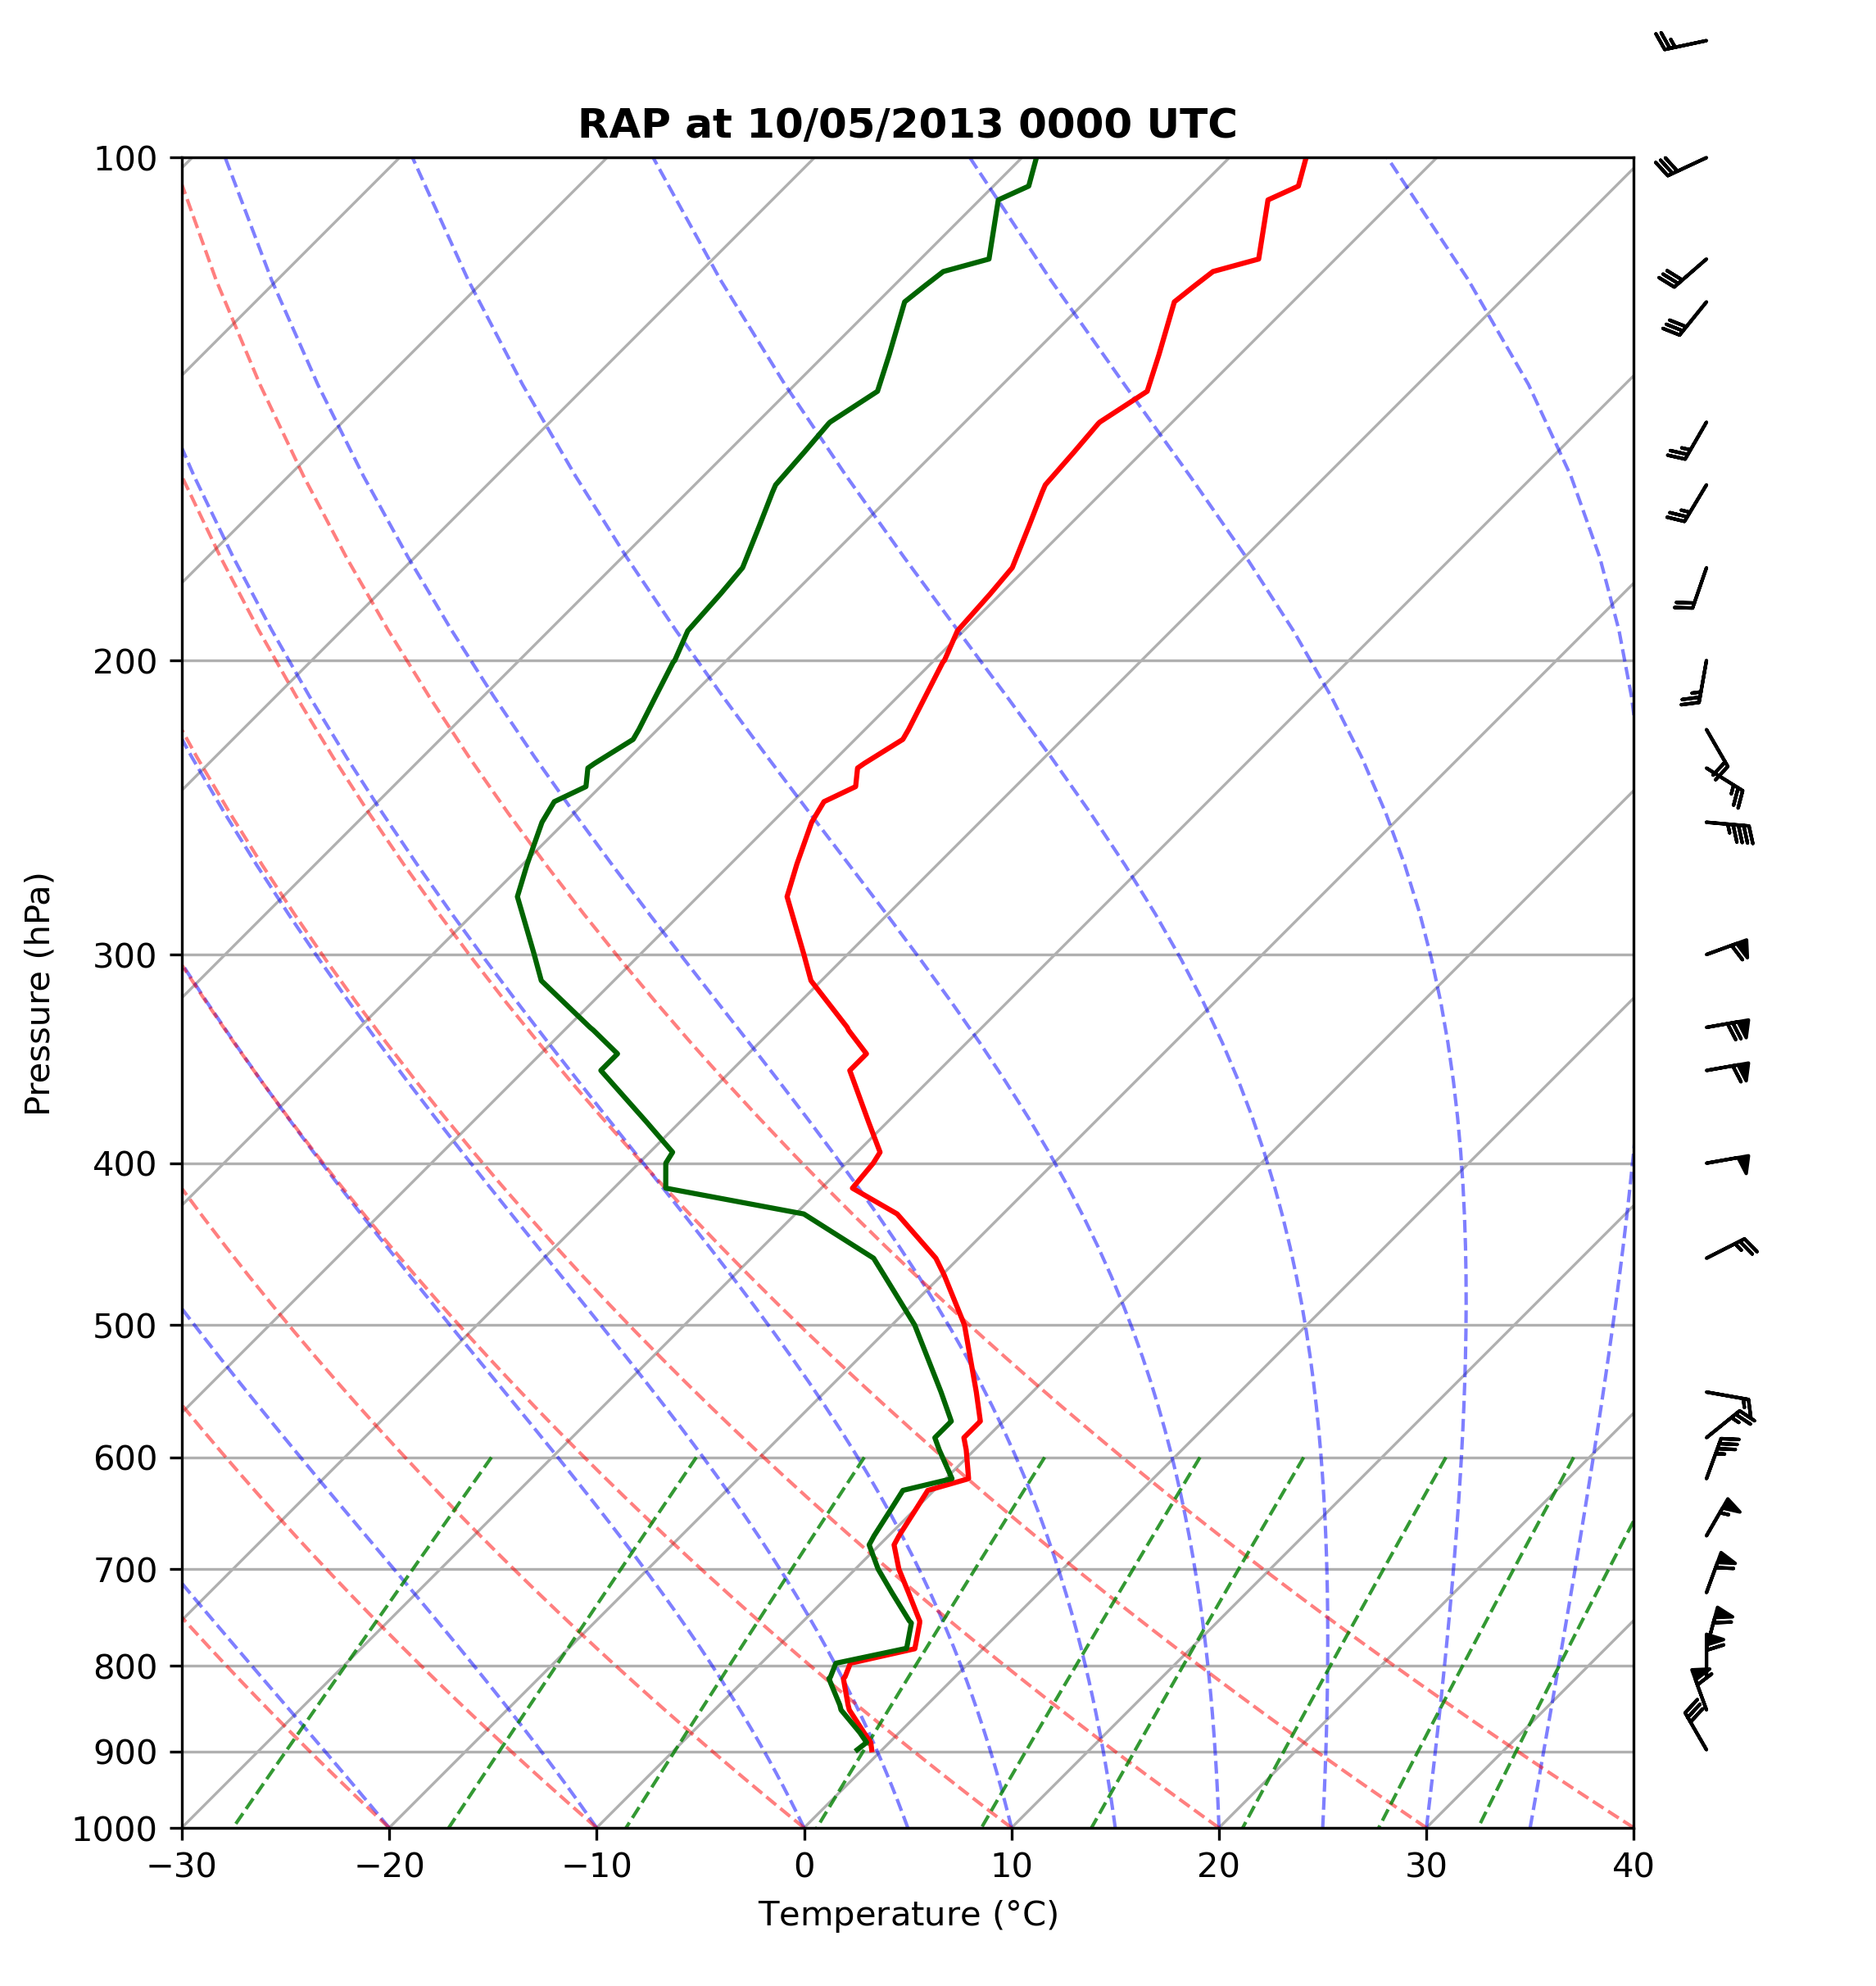

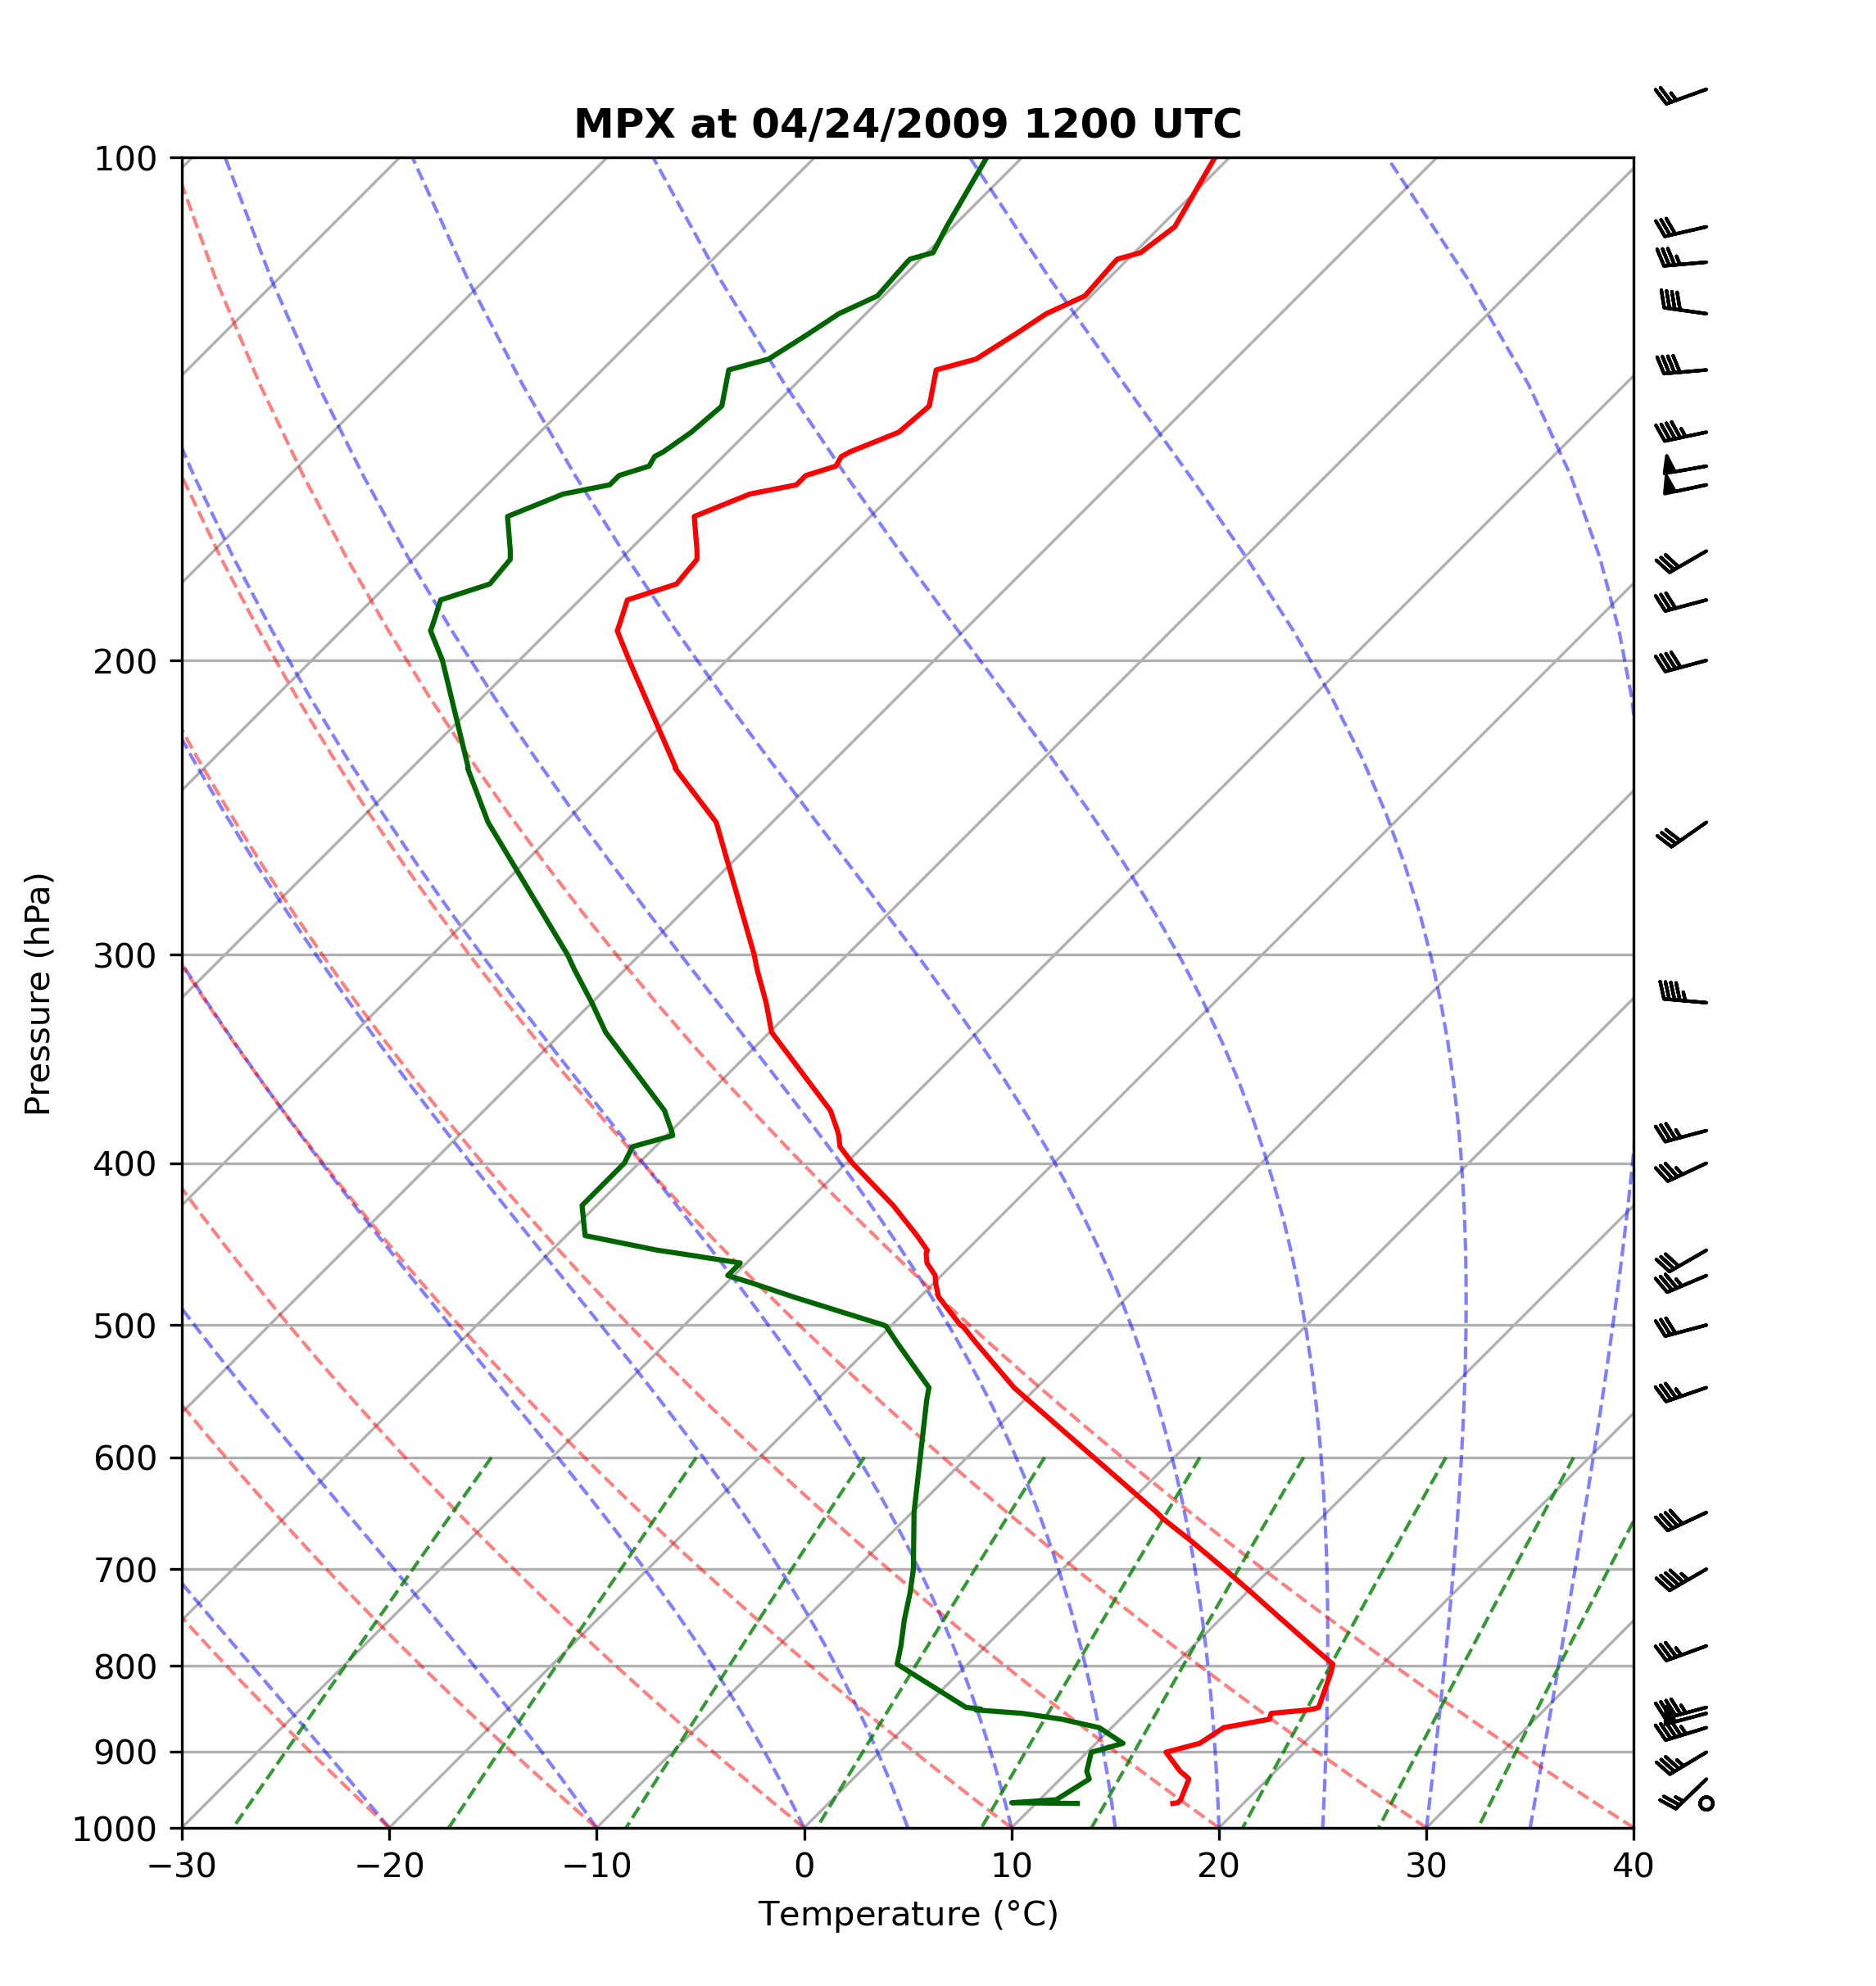

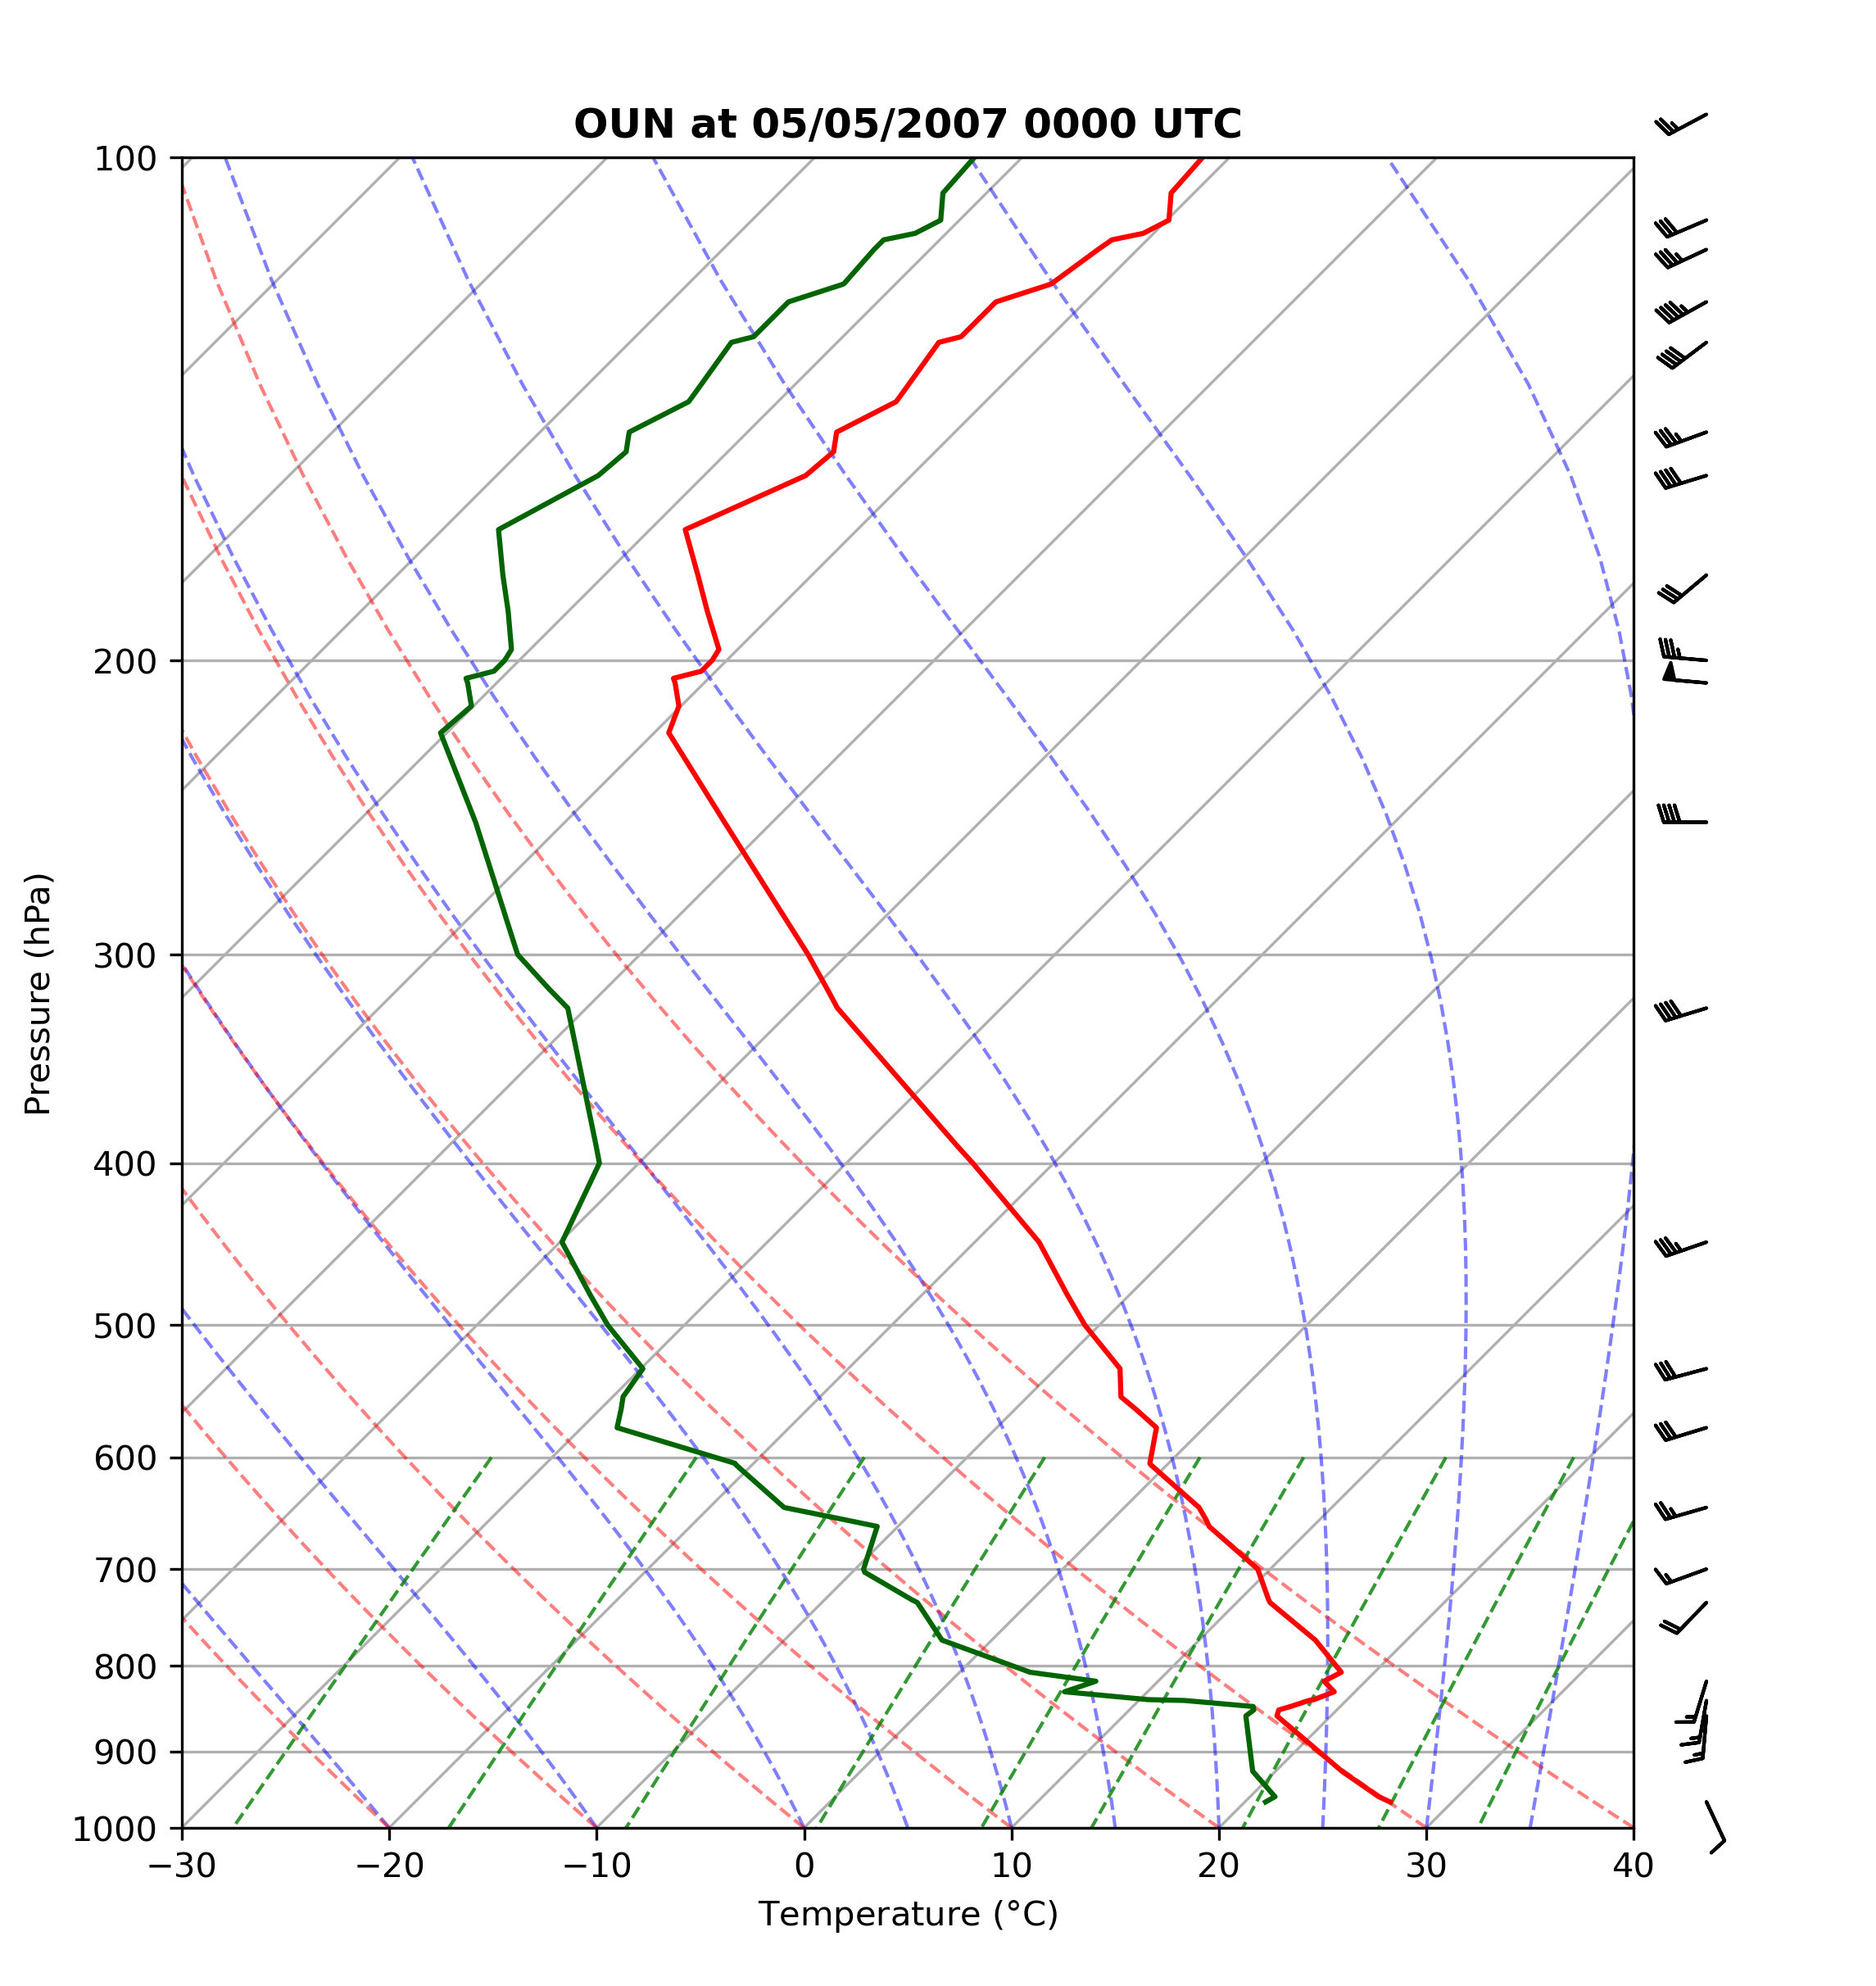

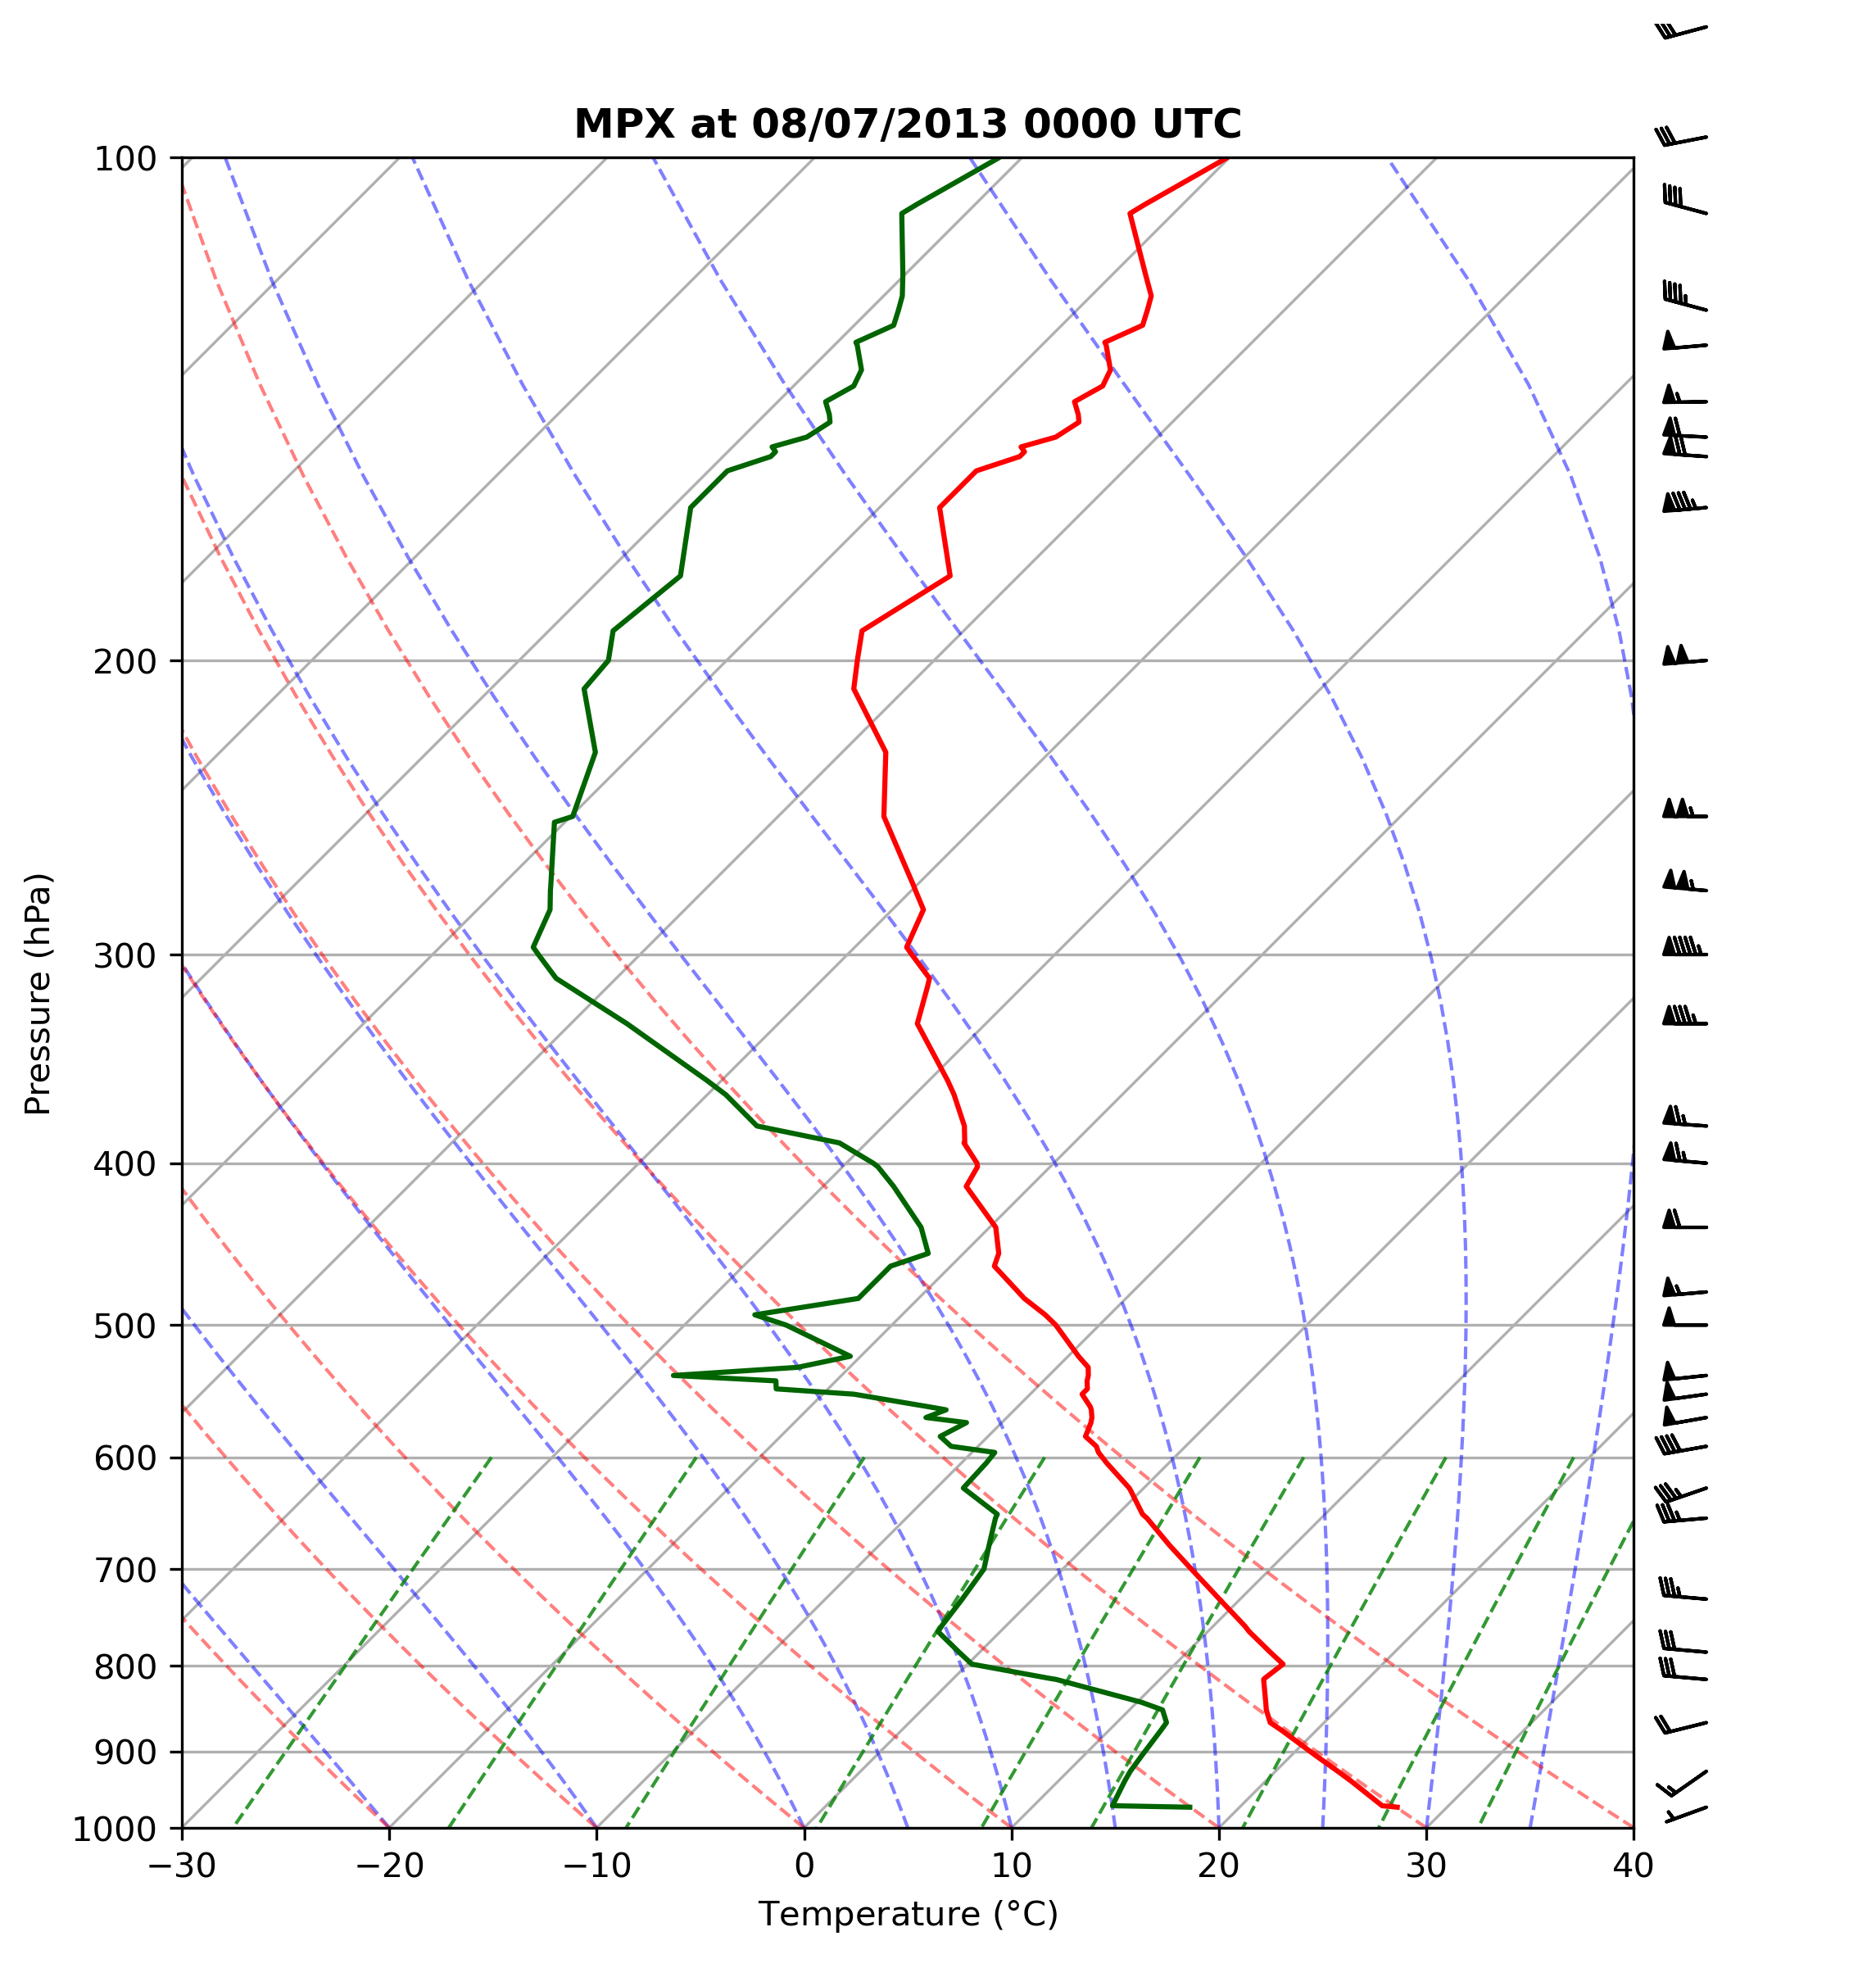

In [47]:
"""
I first create a list (using standard Python syntax, []) containing the sounding sites.  Because Python is zero-based, a list is referenced
as [index_0, index_1, index_2, ...].  Each index in the list contains the sounding site as a string, just like how we have set up the sounding
site in the past.  Note that the order of the list is important.  We will see why in the next list.
"""

sites = ["SGF", "ILN", "RAP", "MPX", "OUN", "MPX"]

"""
I next create a list of times.  Each index is a datetime like we have used in the past.  Note that each index of this
list corresponds with the site contained in the same index in the sites list.
"""

times = [datetime(2007,1,13,0), datetime(2004,1,17,12), datetime(2013,10,5,0), datetime(2009,4,24,12), datetime(2007,5,5,0), datetime(2013,8,7,0)]

"""
Next, we use a for loop to iterate over each sounding.
Unlike other programming languages that require you to iterate sequentially
(e.g., 1, 2, 3, ..., N) over a set of elements, Python allows you to iterate
directly over the elements. Here, we have two elements over which we wish to
iterate: the sites and times. We combine these using Python's zip function and
iterate over them concurrently.

We then use the individual locations and times as input to the data requesting and
skew-T, ln-p plotting functions.
"""

#get the sounding data and plot the Skew-T
for site, time in zip(sites, times):
    #download the data from the University of Wyoming for the date and site that we want
    data = WyomingUpperAir.request_data(time, site)
    #plot the Skew-T using the data we just got from the University of Wyoming.
    plot_skewT(data, site, time)

### You have now completed the Python portion of the lab.  Be sure to submit the fully rendered Jupyter Notebook on GitHub when you are finished.